In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('allv2_csv.csv')

In [4]:
df.describe()

,Tracking Number*,Parent SKU Reference No.,SKU Reference No.,Original Price,Deal Price,Quantity,Returned quantity,Product Subtotal,Total Discount(PHP),Price Discount(from Seller)(PHP),Shopee Rebate(PHP),SKU Total Weight,Number of Items in Order,Order Total Weight,Seller Voucher(PHP),Seller Absorbed Coin Cashback,Shopee Voucher(PHP),Shopee Bundle Discount(PHP),Seller Bundle Discount(PHP),Shopee Coins Offset(PHP),Credit Card Discount Total(PHP),Products' Price Paid by Buyer (PHP),Buyer Paid Shipping Fee,Shipping Rebate Estimate,Reverse Shipping Fee,Service Fee,Grand Total,Estimated Shipping Fee,Zip Code,Note
count,6.235000e+03,0.0,0.0,7902.000000,7902.000000,7902.000000,4205.000000,7902.000000,7902.000000,7902.000000,7902.0,7902.000000,7902.00000,7902.000000,7902.0,7902.0,7902.000000,7902.0,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,7902.000000,0.0
mean,7.880683e+11,NaN,NaN,204.025437,203.945836,1.127816,0.006183,214.636801,0.079600,0.079600,0.0,0.815629,2.21716,1.346131,0.0,0.0,52.096811,0.0,0.168185,311.414832,0.055176,297.109846,30.793217,36.429385,0.014047,18.764110,326.760187,68.319539,3136.400911,NaN
std,1.185130e+09,NaN,NaN,244.968582,244.895923,0.814912,0.089718,249.209526,2.884849,2.884849,0.0,0.940695,2.05473,1.405878,0.0,0.0,46.463360,0.0,3.298381,1539.066035,0.882256,315.019452,47.424190,32.228601,0.905023,17.743344,329.845972,55.944808,1980.988221,NaN
min,7.714717e+11,NaN,NaN,5.000000,5.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.020000,1.00000,0.020000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,7.874656e+11,NaN,NaN,70.000000,70.000000,1.000000,0.000000,80.000000,0.000000,0.000000,0.0,0.200000,1.00000,0.400000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,0.000000,8.000000,126.000000,38.000000,1604.000000,NaN
50%,7.883542e+11,NaN,NaN,150.000000,150.000000,1.000000,0.000000,150.000000,0.000000,0.000000,0.0,0.500000,2.00000,1.000000,0.0,0.0,50.000000,0.0,0.000000,0.000000,0.000000,202.000000,10.000000,38.000000,0.000000,14.000000,226.000000,50.000000,2432.000000,NaN
75%,7.888865e+11,NaN,NaN,250.000000,250.000000,1.000000,0.000000,280.000000,0.000000,0.000000,0.0,1.000000,2.00000,2.000000,0.0,0.0,83.000000,0.0,0.000000,0.000000,0.000000,379.000000,45.000000,50.000000,0.000000,23.750000,400.000000,65.000000,4200.000000,NaN
max,7.894143e+11,NaN,NaN,6750.000000,6750.000000,30.000000,2.000000,6750.000000,230.000000,230.000000,0.0,20.000000,30.00000,20.000000,0.0,0.0,500.000000,0.0,81.000000,20000.000000,50.000000,6750.000000,974.000000,250.000000,68.000000,378.000000,7334.000000,974.000000,9800.000000,NaN


In [5]:
#Transform column name uniformity
df.columns = df.columns.str.upper()
df.columns = df.columns.str.replace("(Y/N)", '')
df.columns = df.columns.str.replace("(BUYER)", '')
df.columns = df.columns.str.replace("(PHP)", '')
df.columns = df.columns.str.replace("/", '')
df.columns = df.columns.str.replace("*", '')
df.columns = df.columns.str.replace(" ", '_')
df.columns = df.columns.str.replace("PRODUCTS'_PRICE_PAID_BY_BUYER_", "PRODUCTS'_PRICE_PAID_BY_BUYER")

In [6]:
#Fix date to YYYY-MM-DD only w/o time
df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])
df['DATE'] = df['ORDER_CREATION_DATE'].dt.date
#Format to datetime64 type
df['DATE'] = pd.to_datetime(df['DATE'])
#Set index to date
df.set_index(df['DATE'], inplace=True)
#Extract Month Only
df['MONTH'] = df['DATE'].dt.month
#Extract Year Only
df['YEAR'] = df['DATE'].dt.year
#Extract Time Only
df['TIME'] = df['ORDER_CREATION_DATE'].dt.time
#Convert to datetime64, round to the nearest hour, and format to only show time w/o dates
# df['TIME'] = pd.to_datetime(df['TIME'], format = '%H:%M:%S').dt.floor('h').dt.strftime('%H:%M:%S')
#Combine Month-Year-Time
df['MONTH-YEAR-TIME'] = df.apply(lambda x: f"{x['YEAR']}-{x['MONTH']}-{x['TIME']}", axis = 1)
#Add Zero in Month
df['MONTH'] = df.apply(lambda x: f"{'0'}{x['MONTH']}" if len(str(x['MONTH'])) < 2 else x['MONTH'], axis = 1)

C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\2105259615.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDER_CREATION_DATE'] = pd.to_datetime(df['ORDER_CREATION_DATE'])


In [7]:
df.dtypes

SOURCE.NAME                      object
ORDER_ID                         object
ORDER_STATUS                     object
RETURN__REFUND_STATUS            object
TRACKING_NUMBER                 float64
                              ...      
DATE                     datetime64[ns]
MONTH                            object
YEAR                              int32
TIME                             object
MONTH-YEAR-TIME                  object
Length: 59, dtype: object

In [8]:
df.head()

,SOURCE.NAME,ORDER_ID,ORDER_STATUS,RETURN__REFUND_STATUS,TRACKING_NUMBER,SHIPPING_OPTION,SHIPMENT_METHOD,ESTIMATED_SHIP_OUT_DATE,SHIP_TIME,ORDER_CREATION_DATE,ORDER_PAID_TIME,PARENT_SKU_REFERENCE_NO.,PRODUCT_NAME,SKU_REFERENCE_NO.,VARIATION_NAME,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,BUNDLE_DEALS_INDICATOR,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,USERNAME_,RECEIVER_NAME,PHONE_NUMBER,DELIVERY_ADDRESS,TOWN,DISTRICT,CITY,PROVINCE,COUNTRY,ZIP_CODE,REMARK_FROM_BUYER,ORDER_COMPLETE_TIME,NOTE,DATE,MONTH,YEAR,TIME,MONTH-YEAR-TIME
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-26,2022_10_sales.xlsx,221026EG38031S,Completed,NaN,7.853490e+11,Standard Local-J&T Express,pickup,28/10/2022 23:55,27/10/2022 17:04,2022-10-26 23:45:00,26/10/2022 23:55,NaN,Branded Preloved Fashion Eyewear Sunglass Fram...,NaN,Asos,150,150,1,NaN,150,0,0,0,0.2,1,0.2,0,0,0,N,0,0,0,0,150,38,0,0,0,188,38,rozaramer,R******r,******84,"******alon Dos, Las Pinas City, Metro Manila, ...",Talon Dos,Las Pinas City,Metro Manila,Metro Manila,PH,1740,NaN,28/10/2022 12:54,NaN,2022-10-26,10,2022,23:45:00,2022-10-23:45:00
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,NaN,7.854053e+11,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,NaN,UK and US-based Stamps,NaN,7,50,50,1,NaN,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,12/11/2022 17:17,NaN,2022-11-11,11,2022,00:05:00,2022-11-00:05:00
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,NaN,7.854053e+11,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,NaN,UK and US-based Stamps,NaN,8,50,50,1,NaN,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,12/11/2022 17:17,NaN,2022-11-11,11,2022,00:05:00,2022-11-00:05:00
2022-11-12,2022_11_sales.xlsx,221112TM4AEEYV,Completed,NaN,7.854193e+11,Standard Local-J&T Express,pickup,15/11/2022 9:26,12/11/2022 18:30,2022-11-12 09:16:00,12/11/2022 9:26,NaN,UK and US Based Journal Stamps for sis Armelyn,NaN,1,1490,1490,1,NaN,1490,0,0,0,1.0,1,1.0,0,0,0,N,0,0,0,0,1490,5,45,0,0,1495,50,armelyndugang_82,A******o,******36,"******Marilao Bulacan, Loma De Gato, Marilao, ...",Loma De Gato,Marilao,Bulacan,North Luzon,PH,3019,NaN,13/11/2022 17:49,NaN,2022-11-12,11,2022,09:16:00,2022-11-09:16:00
2022-11-12,2022_11_sales.xlsx,221112TJESN7AE,Completed,NaN,7.854191e+11,Standard Local-J&T Express,pickup,15/11/2022 8:46,12/11/2022 18:30,2022-11-12 08:46:00,12/11/2022 8:46,NaN,US and UK-Based Stamps for sis Craft,NaN,1,5,5,1,NaN,5,0,0,0,0.3,1,0.3,0,0,0,N,0,0,0,0,5,38,0,0,0,43,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,14/11/2022 8:03,NaN,2022-11-12,11,2022,08:46:00,2022-11-08:46:00


In [9]:
#Change column data type
df['TRACKING_NUMBER'] = df['TRACKING_NUMBER'].astype(str)

In [10]:
df.loc[:, 'PRODUCT_NAME'].unique()

array(['Branded Preloved Fashion Eyewear Sunglass Frames Set 1',
       'UK and US-based Stamps',
       'UK and US Based Journal Stamps for sis Armelyn',
       'US and UK-Based Stamps for sis Craft',
       'US and UK Based Journal Stamps Andee',
       'UK and US Based Journal Stamps', 'UK and US-Based Stamps Winter',
       'US and UK-Based Stamps for VJ', 'UK and US-Based Stamps Tanya',
       'UK and US-Based Stamps for 14cqn_dmpp (2)',
       'Anik-Anik from Live Selling for sis Benna',
       'Stationeries for sis Arm', 'UK and US-Based Stamps 14cqn_dmpp',
       'US and UK-Based Stationeries for sis Aizhen',
       'UK and US Based Journal Stamps for sis Thel',
       'Anik-Anik from Live Selling for Ivana',
       'Anik-Anik from Live Selling for sis Candice',
       'Anik-Anik Live Selling for sis Gem',
       'Stationeries from Live Selling',
       'Anik-Anik from Live Selling for sis Anna',
       'UK and US based products for sis Arm',
       'US and UK Based Products fo

In [11]:
keywords = ['Anik-Anik', 'UK and US', 'Stationeries', 'Anik Anik', "Miner's", "Self", "Checkout", "Checkout", 'US and UK', 'Uk', 'US UK', 'checkout', 'Sis', 'sis']
for product_name in df['PRODUCT_NAME'].unique():
    if not any(keyword in product_name for keyword in keywords):
        print(product_name)
# Checks if any keyword is in the product name

Branded Preloved Fashion Eyewear Sunglass Frames Set 1
Shiro & Eri Food and Shampoo
For Live selling link
Ocean Trico Nose/Eyebrow Hair Trimmer
VINTAGE Sailor Moon Cards [FIRST BATCH]
GUNDAM F91 FOR BOSS ANGELO
Vintage Yashica HVX-502R  Camcorder Video Camera Videocam
VINTAGE Sailor Moon Sailor Jupiter Cards [BATCH 3]
VINTAGE Sailor Moon Sailor Mars cards
VINTAGE Sailor Moon cards [BATCH 2]
VINTAGE Sailor Moon Sailor Mercury Cards [BATCH 4]
2 Sony Digicam Untested
Chacott Cosmetics Face and Shoulder Massager
VINTAGE SAILOR MOON CARDS BANDAI 1993 ONWARDS
Reebok classic shoes preloved
GUNDAM BARBATOS FOR BOSS ANGELO
[DEFECTIVE] Preloved Vintage Branded Digital Camera Digicam
Casio Exilim EX-Z700 Digital Camera
SELF CO for miners surplus
Unbranded Preloved Fashion Eyewear Sunglass Frames Set 1
Sony Cyber-shot DSC-T70 Digital Camera
[DEFECTIVE/ FOR PARTS/DISPLAY] Preloved Vintage Branded Digital Camera Digicam
Authentic Vans Cap with Tag
Vintage Silver Digital Camera Digicam
Shironeko / Wh

In [12]:
df['LIST'] = df.apply(lambda x: 'LIVE' if any(keyword in x['PRODUCT_NAME'] for keyword in keywords) else 'LISTING', axis = 1)

In [13]:
df[df['LIST'].str.contains('LIVE')]

,SOURCE.NAME,ORDER_ID,ORDER_STATUS,RETURN__REFUND_STATUS,TRACKING_NUMBER,SHIPPING_OPTION,SHIPMENT_METHOD,ESTIMATED_SHIP_OUT_DATE,SHIP_TIME,ORDER_CREATION_DATE,ORDER_PAID_TIME,PARENT_SKU_REFERENCE_NO.,PRODUCT_NAME,SKU_REFERENCE_NO.,VARIATION_NAME,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,BUNDLE_DEALS_INDICATOR,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,USERNAME_,RECEIVER_NAME,PHONE_NUMBER,DELIVERY_ADDRESS,TOWN,DISTRICT,CITY,PROVINCE,COUNTRY,ZIP_CODE,REMARK_FROM_BUYER,ORDER_COMPLETE_TIME,NOTE,DATE,MONTH,YEAR,TIME,MONTH-YEAR-TIME,LIST
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,NaN,785405295326.0,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,NaN,UK and US-based Stamps,NaN,7,50,50,1,NaN,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,12/11/2022 17:17,NaN,2022-11-11,11,2022,00:05:00,2022-11-00:05:00,LIVE
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,NaN,785405295326.0,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,NaN,UK and US-based Stamps,NaN,8,50,50,1,NaN,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,12/11/2022 17:17,NaN,2022-11-11,11,2022,00:05:00,2022-11-00:05:00,LIVE
2022-11-12,2022_11_sales.xlsx,221112TM4AEEYV,Completed,NaN,785419262092.0,Standard Local-J&T Express,pickup,15/11/2022 9:26,12/11/2022 18:30,2022-11-12 09:16:00,12/11/2022 9:26,NaN,UK and US Based Journal Stamps for sis Armelyn,NaN,1,1490,1490,1,NaN,1490,0,0,0,1.0,1,1.0,0,0,0,N,0,0,0,0,1490,5,45,0,0,1495,50,armelyndugang_82,A******o,******36,"******Marilao Bulacan, Loma De Gato, Marilao, ...",Loma De Gato,Marilao,Bulacan,North Luzon,PH,3019,NaN,13/11/2022 17:49,NaN,2022-11-12,11,2022,09:16:00,2022-11-09:16:00,LIVE
2022-11-12,2022_11_sales.xlsx,221112TJESN7AE,Completed,NaN,785419084505.0,Standard Local-J&T Express,pickup,15/11/2022 8:46,12/11/2022 18:30,2022-11-12 08:46:00,12/11/2022 8:46,NaN,US and UK-Based Stamps for sis Craft,NaN,1,5,5,1,NaN,5,0,0,0,0.3,1,0.3,0,0,0,N,0,0,0,0,5,38,0,0,0,43,38,craftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,NaN,14/11/2022 8:03,NaN,2022-11-12,11,2022,08:46:00,2022-11-08:46:00,LIVE
2022-11-12,2022_11_sales.xlsx,221112TEMY1KTM,Completed,NaN,785417240310.0,Standard Local-J&T Express,pickup,15/11/2022 7:48,12/11/2022 18:28,2022-11-12 07:38:00,12/11/2022 7:48,NaN,US and UK Based Journal Stamps Andee,NaN,1,15,15,1,NaN,15,0,0,0,0.8,1,0.8,0,0,0,N,0,0,0,0,15,50,0,0,0,65,50,NaN,D******s,******53,"******), Morong, South Luzon, Rizal, 1960",San Juan (Pob.),Morong,Rizal,South Luzon,PH,1960,NaN,14/11/2022 16:14,NaN,2022-11-12,11,2022,07:38:00,2022-11-07:38:00,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-28,2025_01_sales.xlsx,250128M61YY2U7,"Order Received, but buyer can raise return/ref...",NaN,nan,Standard Local-Flash Express,pickup,14/02/2025 0:18,28/01/2025 13:25,2025-01-28 00:15:00,28/01/2025 0:18,NaN,Self CO for live selling ₱220-₱

([<matplotlib.axis.XTick at 0x1ef8caa8800>,
 [Text(200000, 0, '200000'),
  Text(400000, 0, '400000'),
  Text(600000, 0, '600000'),
  Text(800000, 0, '800000'),
  Text(1000000, 0, '1000000'),
  Text(1200000, 0, '1200000'),
  Text(1400000, 0, '1400000'),
  Text(1600000, 0, '1600000')])

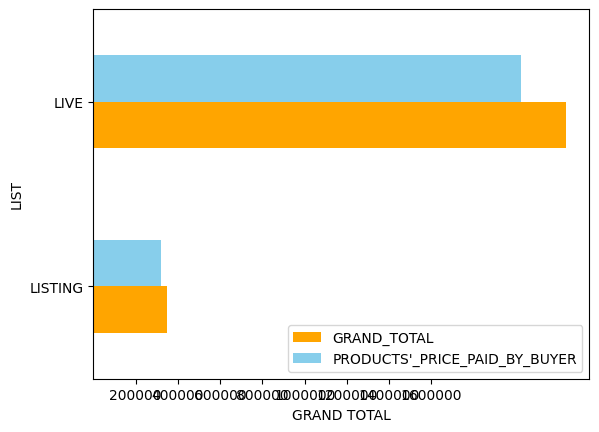

In [14]:
by_list = df.groupby('LIST').sum(numeric_only=True)
by_list.plot.barh(y = ["GRAND_TOTAL", "PRODUCTS'_PRICE_PAID_BY_BUYER"], color = ['orange', 'skyblue'])

plt.xlabel("GRAND TOTAL")
plt.xticks(ticks = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000], labels = ['200000', '400000', '600000', '800000', '1000000', '1200000', '1400000', '1600000'])

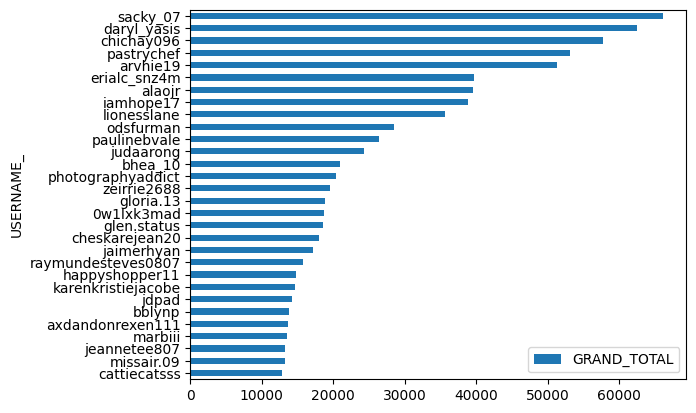

In [15]:
by_username = df.groupby('USERNAME_').sum(numeric_only=True).sort_values(by = 'GRAND_TOTAL', ascending = True)
by_useranme = by_username.tail(30).plot.barh(y = 'GRAND_TOTAL')

<Axes: ylabel='CITY'>

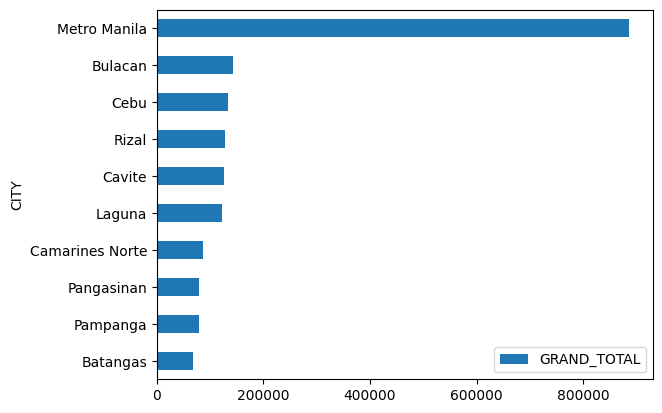

In [16]:
by_city = df.groupby('CITY').sum(numeric_only=True).sort_values(by = 'GRAND_TOTAL', ascending = True)
by_city.tail(10).plot.barh(y = 'GRAND_TOTAL')

In [17]:
pd.DataFrame(by_city['GRAND_TOTAL'].tail(40))

,GRAND_TOTAL
CITY,
Eastern Samar,5970
Oriental Mindoro,6163
Bataan,7243
South Cotabato,7519
Siquijor,7585
Romblon,8550
Misamis Occidental,8957
Zamboanga Del Norte,9641
Tarlac,10258


<Axes: ylabel='PRODUCT_NAME'>

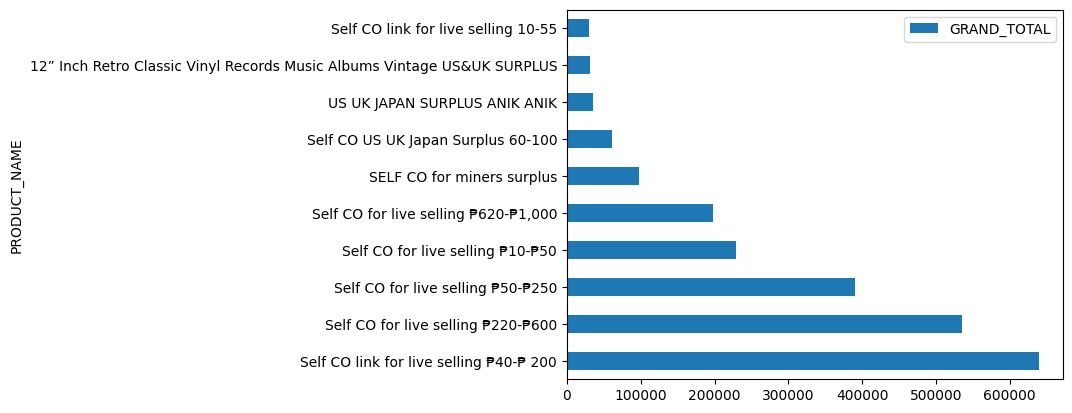

In [18]:
by_product = df.groupby('PRODUCT_NAME').sum(numeric_only=True).sort_values(by = 'GRAND_TOTAL', ascending = False)
by_product.head(10).plot.barh(y = 'GRAND_TOTAL')

In [19]:
pd.DataFrame(by_product['GRAND_TOTAL'].head(20))

,GRAND_TOTAL
PRODUCT_NAME,
Self CO link for live selling ₱40-₱ 200,639998
Self CO for live selling ₱220-₱600,535381
Self CO for live selling ₱50-₱250,389705
Self CO for live selling ₱10-₱50,229371
"Self CO for live selling ₱620-₱1,000",197518
SELF CO for miners surplus,97516
Self CO US UK Japan Surplus 60-100,60882
US UK JAPAN SURPLUS ANIK ANIK,35010
12” Inch Retro Classic Vinyl Records Music Albums Vintage US&UK SURPLUS,31051


In [20]:
#Method:2 Group by username. Determine when was their first and recent order.
result = df.groupby('USERNAME_')['ORDER_CREATION_DATE'].agg(
    first_order='min',
    last_order='max'
)

In [21]:
result

,first_order,last_order
USERNAME_,,
...mjaneeee,2024-11-04 07:28:00,2024-11-04 07:28:00
..lynnn,2024-07-30 21:40:00,2024-08-15 01:44:00
.niakniak,2023-01-14 01:33:00,2023-01-14 01:33:00
.qatara,2025-01-18 17:47:00,2025-01-18 17:47:00
.wena_s,2023-01-30 07:00:00,2023-01-30 07:00:00
...,...,...
zonymendoza,2023-03-17 22:38:00,2023-03-17 22:38:00
zosimalaureta,2023-07-09 11:43:00,2023-07-09 11:43:00
zyndel,2024-08-03 13:39:00,2024-08-06 05:03:00


In [22]:
#Method:2 Group by username. Determine when was their first and recent order.
#Notice how in Method #1, we used ['ORDER_CREATION_DATE'] to pass all first argument as that column.
#Here, we manually put it in the first argument because we will eventually use ['GRAND_TOTAL']
result = df.groupby('USERNAME_').agg(
    FIRST_ORDER = ('ORDER_CREATION_DATE', 'min'),
    LAST_ORDER = ('ORDER_CREATION_DATE', 'max'),
    PURCHASE_TOTAL = ('GRAND_TOTAL', 'sum')
).sort_values(by = 'PURCHASE_TOTAL', ascending = False)

In [23]:
result

,FIRST_ORDER,LAST_ORDER,PURCHASE_TOTAL
USERNAME_,,,
sacky_07,2024-01-19 23:45:00,2025-01-21 20:30:00,66130
daryl_yasis,2024-01-20 23:34:00,2025-01-25 21:51:00,62590
chichay096,2023-11-12 05:05:00,2024-10-02 22:30:00,57704
pastrychef,2023-09-29 00:23:00,2025-01-18 18:54:00,53100
arvhie19,2023-11-07 05:07:00,2024-12-16 10:52:00,51301
...,...,...,...
norielyn19,2023-04-18 23:28:00,2023-04-18 23:28:00,0
belindabarwelvalenzuela,2023-07-25 13:59:00,2023-07-25 13:59:00,0
shay1982,2024-01-21 08:14:00,2024-01-21 08:14:00,0


In [24]:
df['USERNAME_'] = df['USERNAME_'].apply(lambda x: '***' + x[3:] if isinstance(x, str) and len(x) > 3 else x)

In [25]:
df.fillna('')

,SOURCE.NAME,ORDER_ID,ORDER_STATUS,RETURN__REFUND_STATUS,TRACKING_NUMBER,SHIPPING_OPTION,SHIPMENT_METHOD,ESTIMATED_SHIP_OUT_DATE,SHIP_TIME,ORDER_CREATION_DATE,ORDER_PAID_TIME,PARENT_SKU_REFERENCE_NO.,PRODUCT_NAME,SKU_REFERENCE_NO.,VARIATION_NAME,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,BUNDLE_DEALS_INDICATOR,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,USERNAME_,RECEIVER_NAME,PHONE_NUMBER,DELIVERY_ADDRESS,TOWN,DISTRICT,CITY,PROVINCE,COUNTRY,ZIP_CODE,REMARK_FROM_BUYER,ORDER_COMPLETE_TIME,NOTE,DATE,MONTH,YEAR,TIME,MONTH-YEAR-TIME,LIST
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-26,2022_10_sales.xlsx,221026EG38031S,Completed,,785348988418.0,Standard Local-J&T Express,pickup,28/10/2022 23:55,27/10/2022 17:04,2022-10-26 23:45:00,26/10/2022 23:55,,Branded Preloved Fashion Eyewear Sunglass Fram...,,Asos,150,150,1,,150,0,0,0,0.2,1,0.2,0,0,0,N,0,0,0,0,150,38,0,0,0,188,38,***aramer,R******r,******84,"******alon Dos, Las Pinas City, Metro Manila, ...",Talon Dos,Las Pinas City,Metro Manila,Metro Manila,PH,1740,,28/10/2022 12:54,,2022-10-26,10,2022,23:45:00,2022-10-23:45:00,LISTING
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,,785405295326.0,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,,UK and US-based Stamps,,7,50,50,1,,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,***ftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,,12/11/2022 17:17,,2022-11-11,11,2022,00:05:00,2022-11-00:05:00,LIVE
2022-11-11,2022_11_sales.xlsx,221111Q4W4YN38,Completed,,785405295326.0,Standard Local-J&T Express,pickup,15/11/2022 0:06,11/11/2022 18:42,2022-11-11 00:05:00,11/11/2022 0:06,,UK and US-based Stamps,,8,50,50,1,,50,0,0,0,0.1,2,0.2,0,0,0,N,0,0,0,0,100,19,19,0,0,119,38,***ftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,,12/11/2022 17:17,,2022-11-11,11,2022,00:05:00,2022-11-00:05:00,LIVE
2022-11-12,2022_11_sales.xlsx,221112TM4AEEYV,Completed,,785419262092.0,Standard Local-J&T Express,pickup,15/11/2022 9:26,12/11/2022 18:30,2022-11-12 09:16:00,12/11/2022 9:26,,UK and US Based Journal Stamps for sis Armelyn,,1,1490,1490,1,,1490,0,0,0,1.0,1,1.0,0,0,0,N,0,0,0,0,1490,5,45,0,0,1495,50,***elyndugang_82,A******o,******36,"******Marilao Bulacan, Loma De Gato, Marilao, ...",Loma De Gato,Marilao,Bulacan,North Luzon,PH,3019,,13/11/2022 17:49,,2022-11-12,11,2022,09:16:00,2022-11-09:16:00,LIVE
2022-11-12,2022_11_sales.xlsx,221112TJESN7AE,Completed,,785419084505.0,Standard Local-J&T Express,pickup,15/11/2022 8:46,12/11/2022 18:30,2022-11-12 08:46:00,12/11/2022 8:46,,US and UK-Based Stamps for sis Craft,,1,5,5,1,,5,0,0,0,0.3,1,0.3,0,0,0,N,0,0,0,0,5,38,0,0,0,43,38,***ftmentalitie,M******n,******94,"******view, Quezon City, Metro Manila, Metro M...",North Fairview,Quezon City,Metro Manila,Metro Manila,PH,1121,,14/11/2022 8:03,,2022-11-12,11,2022,08:46:00,2022-11-08:46:00,LIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-28,2025_01_sales.xlsx,250128M61YY2U7,"Order Received, but buyer can raise return/ref...",,nan,Standard Local-Flash Express,pickup,14/02/2025 0:18,28/01/2025 13:25,2025-01-28 00:15:00,28/01/2025 0:18,,Self CO for live selling ₱220-₱600,,500,500,500,1,0.0,500,0,0,0,3.0,2,4.0,0,0

In [26]:
df.groupby(df.index).sum(numeric_only=True)

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-26,0.0,0.0,150,150,1,0.0,150,0,0,0,0.2,1,0.2,0,0,0,0,0,0,0,150,38,0,0,0,188,38,1740,0.0,2022
2022-11-11,0.0,0.0,105,105,3,0.0,105,0,0,0,1.0,5,1.2,0,0,0,0,0,0,0,205,83,38,0,0,288,121,6344,0.0,6066
2022-11-12,0.0,0.0,1510,1510,3,0.0,1510,0,0,0,2.1,3,2.1,0,0,0,0,0,0,0,1510,93,45,0,0,1603,138,6100,0.0,6066
2022-11-13,0.0,0.0,215,215,1,0.0,215,0,0,0,0.3,1,0.3,0,0,0,0,0,0,0,215,16,22,0,0,231,38,4103,0.0,2022
2022-11-15,0.0,0.0,2000,2000,4,0.0,2000,0,0,0,1.6,4,1.6,0,0,222,0,0,12100,0,1657,111,41,0,0,1768,152,4936,0.0,8088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-24,0.0,0.0,3650,3650,11,0.0,3650,0,0,0,19.2,19,31.4,0,0,359,0,0,200,52,5433,288,762,0,261,5721,1064,31402,0.0,22275
2025-01-25,0.0,0.0,160,160,17,0.0,790,0,0,0,1.7,34,3.4,0,0,176,0,0,0,0,1420,16,216,0,70,1436,232,18400,0.0,8100
2025-01-27,0.0,0.0,360,360,23,0.0,570,0,0,0,5.2,23,5.2,0,0,46,0,0,900,0,515,33,83,0,26,548,153,8625,0.0,4050


In [27]:
df['MONTH-YEAR'] = df.apply(lambda x: f"{x['YEAR']}-{x['MONTH']}", axis = 1)
df['MONTH-YEAR'] = pd.to_datetime(df['MONTH-YEAR'])

In [28]:
by_monthyear = df.groupby('MONTH-YEAR').sum(numeric_only=True).sort_values(by = 'MONTH-YEAR', ascending =True)
by_monthyear_2022 = by_monthyear[by_monthyear.index.astype(str).str.startswith('2022')]
by_monthyear_2023 = by_monthyear[by_monthyear.index.astype(str).str.startswith('2023')]
by_monthyear_2024 = by_monthyear[by_monthyear.index.astype(str).str.startswith('2024')]

In [29]:
pd.DataFrame(by_monthyear['GRAND_TOTAL'])

,GRAND_TOTAL
MONTH-YEAR,
2022-10-01,188
2022-11-01,23084
2022-12-01,31519
2023-01-01,16305
2023-02-01,72299
2023-03-01,27044
2023-04-01,27554
2023-05-01,25397
2023-06-01,6932


In [30]:
by_monthyear['CHANGE'] = by_monthyear['GRAND_TOTAL'].diff().fillna(0)
by_monthyear['CHANGE_%'] = (by_monthyear['CHANGE'] / by_monthyear['GRAND_TOTAL'].shift(1)) * 100
by_monthyear['CHANGE_%_MEAN'] = by_monthyear['CHANGE_%'].mean()

In [31]:
by_monthyear[['GRAND_TOTAL', 'CHANGE', 'CHANGE_%']]

,GRAND_TOTAL,CHANGE,CHANGE_%
MONTH-YEAR,,,
2022-10-01,188,0.0,NaN
2022-11-01,23084,22896.0,12178.723404
2022-12-01,31519,8435.0,36.540461
2023-01-01,16305,-15214.0,-48.269298
2023-02-01,72299,55994.0,343.416130
2023-03-01,27044,-45255.0,-62.594227
2023-04-01,27554,510.0,1.885816
2023-05-01,25397,-2157.0,-7.828264
2023-06-01,6932,-18465.0,-72.705438


In [32]:
pd.DataFrame(by_monthyear_2022['GRAND_TOTAL'])

,GRAND_TOTAL
MONTH-YEAR,
2022-10-01,188
2022-11-01,23084
2022-12-01,31519


<Axes: xlabel='MONTH-YEAR'>

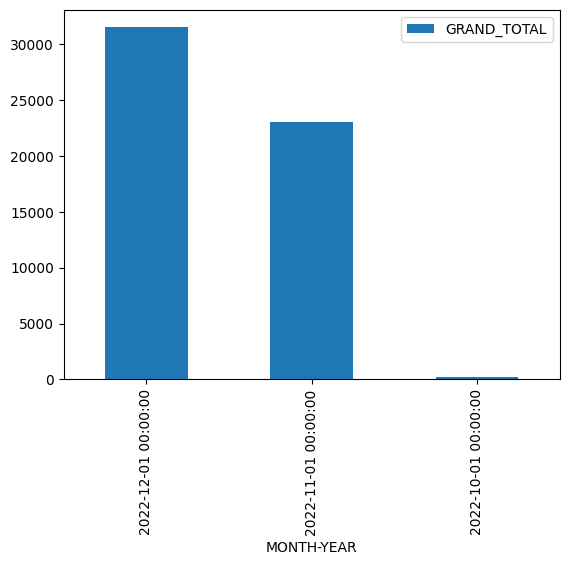

In [33]:
by_monthyear_2022.sort_values(by = 'GRAND_TOTAL', ascending = False).plot.bar(y = 'GRAND_TOTAL')

In [34]:
by_monthyear_2022['CHANGE'] = by_monthyear_2022['GRAND_TOTAL'].diff().fillna(0)
by_monthyear_2022['CHANGE_MEAN'] = by_monthyear_2022['CHANGE'].mean()
by_monthyear_2022['CHANGE_PER_MONTH_%'] = (by_monthyear_2022['CHANGE'] / by_monthyear_2022['GRAND_TOTAL'].shift(1)) * 100
by_monthyear_2022['CHANGE_PER_MONTH_%_MEAN'] = by_monthyear_2022['CHANGE_PER_MONTH_%'].mean()
by_monthyear_2022

C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\1438491558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2022['CHANGE'] = by_monthyear_2022['GRAND_TOTAL'].diff().fillna(0)
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\1438491558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2022['CHANGE_MEAN'] = by_monthyear_2022['CHANGE'].mean()
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\1438491558.py:3: SettingWithCopyWarning: 

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR,CHANGE,CHANGE_MEAN,CHANGE_PER_MONTH_%,CHANGE_PER_MONTH_%_MEAN
MONTH-YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-01,0.0,0.0,150,150,1,0.0,150,0,0,0,0.2,1,0.2,0,0,0,0,0,0,0,150,38,0,0,0,188,38,1740,0.0,2022,0.0,10443.666667,NaN,6107.631933
2022-11-01,0.0,0.0,20982,20982,55,0.0,20982,0,0,0,72.4,59,74.3,0,0,222,0,0,14400,0,21065,2019,588,0,0,23084,2607,142157,0.0,111210,22896.0,10443.666667,12178.723404,6107.631933
2022-12-01,0.0,0.0,28295,28295,74,0.0,28295,0,0,0,87.8,74,87.8,0,0,0,0,0,1100,0,28316,3203,862,0,0,31519,4065,226628,0.0,149628,8435.0,10443.666667,36.540461,6107.631933


<Axes: xlabel='MONTH-YEAR'>

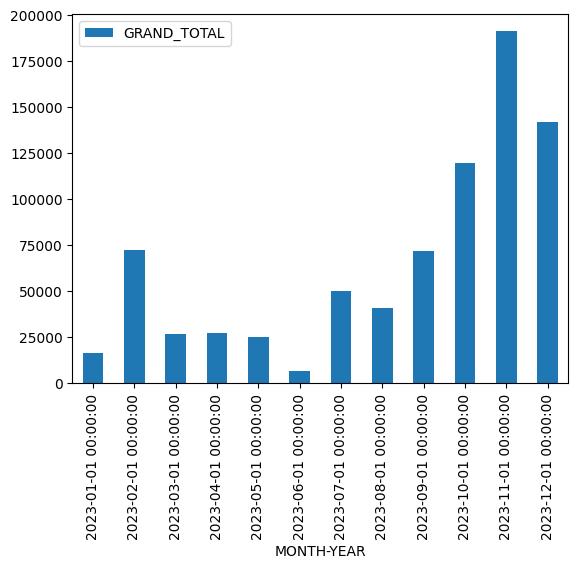

In [35]:
by_monthyear_2023.sort_values(by = 'MONTH-YEAR', ascending = True).plot.bar(y = 'GRAND_TOTAL')

In [36]:
by_monthyear_2023['CHANGE'] = by_monthyear_2023['GRAND_TOTAL'].diff().fillna(0)
by_monthyear_2023['CHANGE_MEAN'] = by_monthyear_2023['CHANGE'].mean()
by_monthyear_2023['CHANGE_PER_MONTH_%'] = (by_monthyear_2023['CHANGE'] / by_monthyear_2023['GRAND_TOTAL'].shift(1)) * 100
by_monthyear_2023['CHANGE_PER_MONTH_%_MEAN'] = by_monthyear_2023['CHANGE_PER_MONTH_%'].mean()
by_monthyear_2023

C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\52557633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2023['CHANGE'] = by_monthyear_2023['GRAND_TOTAL'].diff().fillna(0)
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\52557633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2023['CHANGE_MEAN'] = by_monthyear_2023['CHANGE'].mean()
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\52557633.py:3: SettingWithCopyWarning: 
A val

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR,CHANGE,CHANGE_MEAN,CHANGE_PER_MONTH_%,CHANGE_PER_MONTH_%_MEAN
MONTH-YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,0.0,0.0,14453,14453,55,0.0,14613,0,0,0,45.00,57,45.20,0,0,113,0,0,31900,0,14252,2553,38,0,0,16305,2629,157423,0.0,105196,0.0,10479.5,NaN,89.142479
2023-02-01,0.0,0.0,49092,48742,153,0.0,49432,350,350,0,75.92,527,90.38,0,0,328,0,0,40800,0,71358,4253,3438,43,1299,72299,7787,451319,0.0,295358,55994.0,10479.5,343.416130,89.142479
2023-03-01,0.0,0.0,20905,20905,85,0.0,21250,0,0,0,31.14,152,35.50,0,0,100,0,0,14700,0,26522,1172,2725,0,1461,27044,4019,217249,0.0,163863,-45255.0,10479.5,-62.594227,89.142479
2023-04-01,0.0,0.0,25270,25265,49,0.0,25415,5,5,0,23.58,57,23.90,0,0,50,0,0,3800,0,25922,2085,1230,0,1435,27554,3353,137097,0.0,95081,510.0,10479.5,1.885816,89.142479
2023-05-01,0.0,0.0,23370,23320,78,0.0,23890,50,50,0,46.20,89,47.70,0,0,50,0,0,13200,0,24524,873,2792,0,1382,25397,3665,224778,0.0,141610,-2157.0,10479.5,-7.828264,89.142479
2023-06-01,0.0,0.0,6800,6800,25,0.0,6800,0,0,0,12.50,27,12.70,0,0,100,0,0,10600,0,6814,118,1124,0,393,6932,1242,72398,0.0,50575,-18465.0,10479.5,-72.705438,89.142479
2023-07-01,0.0,0.0,45975,45975,169,0.0,46860,0,0,0,124.20,210,129.90,0,0,1421,0,0,30300,0,48330,1794,6955,0,2787,49964,8807,490226,0.0,321657,43032.0,10479.5,620.773226,89.142479
2023-08-01,0.0,0.0,38948,38948,143,0.0,39368,0,0,0,127.34,175,138.74,0,0,8887,0,0,3100,0,35898,5308,3185,0,2500,41126,8565,449829,0.0,279174,-8838.0,10479.5,-17.688736,89.142479
2023-09-01,0.0,0.0,73390,73390,320,0.0,74580,0,0,0,176.44,422,202.16,0,0,21872,0,0,95000,0,60412,11726,4164,0,4660,72138,15883,918232,0.0,598808,31012.0,10479.5,75.407285,89.142479


In [37]:
pd.DataFrame(by_monthyear_2023['GRAND_TOTAL'])

,GRAND_TOTAL
MONTH-YEAR,
2023-01-01,16305
2023-02-01,72299
2023-03-01,27044
2023-04-01,27554
2023-05-01,25397
2023-06-01,6932
2023-07-01,49964
2023-08-01,41126
2023-09-01,72138


<Axes: xlabel='MONTH-YEAR'>

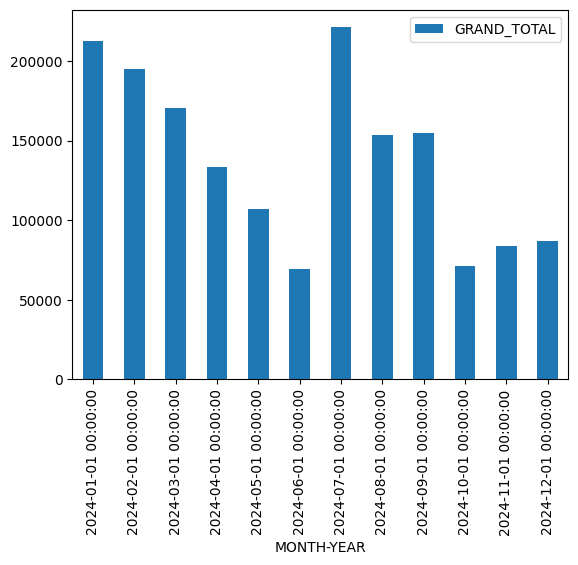

In [38]:
by_monthyear_2024.plot.bar(y = 'GRAND_TOTAL')

In [39]:
by_monthyear_2024['CHANGE'] = by_monthyear_2024['GRAND_TOTAL'].diff().fillna(0)
by_monthyear_2024['CHANGE_%'] = (by_monthyear_2024['CHANGE'] / by_monthyear_2024['GRAND_TOTAL'].shift(1)) * 100
by_monthyear_2024['CHANGE_%_MEAN'] = by_monthyear_2024['CHANGE_%'].mean()
by_monthyear_2024

C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\907211211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2024['CHANGE'] = by_monthyear_2024['GRAND_TOTAL'].diff().fillna(0)
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\907211211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_monthyear_2024['CHANGE_%'] = (by_monthyear_2024['CHANGE'] / by_monthyear_2024['GRAND_TOTAL'].shift(1)) * 100
C:\Users\Joshua Eirus Candido\AppData\Local\Temp\ipykernel_21324\9

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR,CHANGE,CHANGE_%,CHANGE_%_MEAN
MONTH-YEAR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.0,0.0,88430,88430,634,0.0,98450,0,0,0,232.00,1671,517.45,0,0,23715,0,0,393500,0,195308,17546,26571,68,12471,212664,44173,1802409,0.0,1099032,0.0,NaN,5.253158
2024-02-01,0.0,0.0,97435,97435,582,0.0,103895,0,0,0,261.30,1416,541.15,0,0,24988,0,0,133300,0,184367,11115,28462,0,11787,195347,39499,1712844,0.0,1068672,-17317.0,-8.142892,5.253158
2024-03-01,0.0,0.0,86575,86477,546,3.0,92137,98,98,0,226.27,1223,459.91,0,0,20235,0,456,243500,0,165581,5527,26325,0,10524,170733,31852,1525367,0.0,993784,-24614.0,-12.600142,5.253158
2024-04-01,0.0,0.0,78302,78221,440,5.0,81191,81,81,0,209.05,920,365.20,0,0,18296,0,648,215600,0,128910,4897,19317,0,8334,133504,24214,1256440,0.0,839960,-37229.0,-21.805392,5.253158
2024-05-01,0.0,0.0,80554,80554,401,1.0,82544,0,0,0,209.85,684,321.75,0,0,22870,0,0,51300,0,101107,5791,16302,0,6961,106898,22093,1165022,0.0,771144,-26606.0,-19.928991,5.253158
2024-06-01,0.0,0.0,54354,54354,294,1.0,56184,0,0,0,184.82,481,282.61,0,0,14454,0,0,55300,0,66032,3764,11501,0,4521,69607,15387,792885,0.0,560648,-37291.0,-34.884656,5.253158
2024-07-01,0.0,0.0,127420,127420,666,1.0,131700,0,0,0,619.40,1366,1164.65,0,0,32954,0,0,123900,0,199605,21698,26167,0,13067,221123,47865,2099241,0.0,1246784,151516.0,217.673510,5.253158
2024-08-01,0.0,0.0,86410,86365,461,5.0,89425,45,45,0,812.17,892,1329.24,0,0,17321,0,225,95300,5,130865,22756,22271,0,8328,153395,46569,1566676,0.0,850080,-67728.0,-30.629107,5.253158
2024-09-01,0.0,0.0,98030,98030,649,4.0,105880,0,0,0,758.60,1166,1233.05,0,0,24280,0,0,133700,0,140995,14392,22311,0,9296,154763,40054,1726214,0.0,1026168,1368.0,0.891815,5.253158


In [40]:
pd.DataFrame(by_monthyear_2024['GRAND_TOTAL'])

,GRAND_TOTAL
MONTH-YEAR,
2024-01-01,212664
2024-02-01,195347
2024-03-01,170733
2024-04-01,133504
2024-05-01,106898
2024-06-01,69607
2024-07-01,221123
2024-08-01,153395
2024-09-01,154763


In [41]:
df.groupby('MONTH-YEAR-TIME').sum(numeric_only = True)

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR
MONTH-YEAR-TIME,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-23:45:00,0.0,0.0,150,150,1,0.0,150,0,0,0,0.2,1,0.2,0,0,0,0,0,0,0,150,38,0,0,0,188,38,1740,0.0,2022
2022-11-00:00:00,0.0,0.0,570,570,2,0.0,570,0,0,0,4.0,2,4.0,0,0,0,0,0,0,0,570,0,88,0,0,570,88,3800,0.0,4044
2022-11-00:05:00,0.0,0.0,100,100,2,0.0,100,0,0,0,0.2,4,0.4,0,0,0,0,0,0,0,200,38,38,0,0,238,76,2242,0.0,4044
2022-11-00:42:00,0.0,0.0,900,900,1,0.0,900,0,0,0,3.0,1,3.0,0,0,0,0,0,0,0,900,55,0,0,0,955,55,3019,0.0,2022
2022-11-01:09:00,0.0,0.0,140,140,1,0.0,140,0,0,0,1.0,1,1.0,0,0,0,0,0,0,0,140,38,0,0,0,178,38,4108,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-1-23:19:00,0.0,0.0,350,350,2,0.0,350,0,0,0,2.0,4,4.0,0,0,0,0,0,0,0,700,0,72,0,32,700,72,3264,0.0,4050
2025-1-23:28:00,0.0,0.0,310,310,2,0.0,310,0,0,0,3.1,4,6.2,0,0,60,0,0,9000,10,460,20,80,0,28,480,100,2210,0.0,4050
2025-1-23:41:00,0.0,0.0,180,180,1,0.0,180,0,0,0,1.0,1,1.0,0,0,15,0,0,0,2,163,36,0,0,8,199,36,1113,0.0,2025


In [42]:
df.groupby('ORDER_CREATION_DATE').sum(numeric_only=True)

,PARENT_SKU_REFERENCE_NO.,SKU_REFERENCE_NO.,ORIGINAL_PRICE,DEAL_PRICE,QUANTITY,RETURNED_QUANTITY,PRODUCT_SUBTOTAL,TOTAL_DISCOUNT,PRICE_DISCOUNT(FROM_SELLER),SHOPEE_REBATE,SKU_TOTAL_WEIGHT,NUMBER_OF_ITEMS_IN_ORDER,ORDER_TOTAL_WEIGHT,SELLER_VOUCHER,SELLER_ABSORBED_COIN_CASHBACK,SHOPEE_VOUCHER,SHOPEE_BUNDLE_DISCOUNT,SELLER_BUNDLE_DISCOUNT,SHOPEE_COINS_OFFSET,CREDIT_CARD_DISCOUNT_TOTAL,PRODUCTS'_PRICE_PAID_BY_BUYER,BUYER_PAID_SHIPPING_FEE,SHIPPING_REBATE_ESTIMATE,REVERSE_SHIPPING_FEE,SERVICE_FEE,GRAND_TOTAL,ESTIMATED_SHIPPING_FEE,ZIP_CODE,NOTE,YEAR
ORDER_CREATION_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-10-26 23:45:00,0.0,0.0,150,150,1,0.0,150,0,0,0,0.2,1,0.2,0,0,0,0,0,0,0,150,38,0,0,0,188,38,1740,0.0,2022
2022-11-11 00:05:00,0.0,0.0,100,100,2,0.0,100,0,0,0,0.2,4,0.4,0,0,0,0,0,0,0,200,38,38,0,0,238,76,2242,0.0,4044
2022-11-11 23:40:00,0.0,0.0,5,5,1,0.0,5,0,0,0,0.8,1,0.8,0,0,0,0,0,0,0,5,45,0,0,0,50,45,4102,0.0,2022
2022-11-12 07:38:00,0.0,0.0,15,15,1,0.0,15,0,0,0,0.8,1,0.8,0,0,0,0,0,0,0,15,50,0,0,0,65,50,1960,0.0,2022
2022-11-12 08:46:00,0.0,0.0,5,5,1,0.0,5,0,0,0,0.3,1,0.3,0,0,0,0,0,0,0,5,38,0,0,0,43,38,1121,0.0,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-28 00:15:00,0.0,0.0,1500,1500,2,0.0,1500,0,0,0,4.0,4,8.0,0,0,300,0,0,0,0,2700,0,190,0,134,2700,280,7030,0.0,4050
2025-01-28 00:33:00,0.0,0.0,350,350,2,0.0,350,0,0,0,2.0,4,4.0,0,0,106,0,0,0,0,594,72,0,0,32,666,72,3404,0.0,4050
2025-01-28 00:55:00,0.0,0.0,180,180,1,0.0,180,0,0,0,1.0,1,1.0,0,0,15,0,0,0,1,164,36,0,0,8,200,36,1113,0.0,2025


In [43]:
#filter according to time
# am_12 = df[(df['TIME'].astype(str).str.startswith('00')) & (df['YEAR'].astype(str).str.startswith('2022'))] #time, filtered with year
am_12 = df[(df['TIME'].astype(str).str.startswith('00'))]
am_1 = df[df['TIME'].astype(str).str.startswith('01')]
am_2 = df[df['TIME'].astype(str).str.startswith('02')]
am_3 = df[df['TIME'].astype(str).str.startswith('03')]
am_4 = df[df['TIME'].astype(str).str.startswith('04')]
am_5 = df[df['TIME'].astype(str).str.startswith('05')]
am_6 = df[df['TIME'].astype(str).str.startswith('06')]
am_7 = df[df['TIME'].astype(str).str.startswith('07')]
am_8 = df[df['TIME'].astype(str).str.startswith('08')]
am_9 = df[df['TIME'].astype(str).str.startswith('09')]
am_10 = df[df['TIME'].astype(str).str.startswith('10')]
am_11 = df[df['TIME'].astype(str).str.startswith('11')]
pm_1 = df[df['TIME'].astype(str).str.startswith('13')]
pm_2 = df[df['TIME'].astype(str).str.startswith('14')]
pm_3 = df[df['TIME'].astype(str).str.startswith('15')]
pm_4 = df[df['TIME'].astype(str).str.startswith('16')]
pm_5 = df[df['TIME'].astype(str).str.startswith('17')]
pm_6 = df[df['TIME'].astype(str).str.startswith('18')]
pm_7 = df[df['TIME'].astype(str).str.startswith('19')]
pm_8 = df[df['TIME'].astype(str).str.startswith('20')]
pm_9 = df[df['TIME'].astype(str).str.startswith('21')]
pm_10 = df[df['TIME'].astype(str).str.startswith('22')]
pm_11 = df[df['TIME'].astype(str).str.startswith('23')]
pm_12 = df[df['TIME'].astype(str).str.startswith('24')]

In [44]:
#Time Summary Test
ran = range(1, 24)
pd.DataFrame({
    'Grand_Total': [am_12['GRAND_TOTAL'].sum(numeric_only=True),
                    am_1['GRAND_TOTAL'].sum(numeric_only=True),
                    am_2['GRAND_TOTAL'].sum(numeric_only=True),
                    am_3['GRAND_TOTAL'].sum(numeric_only=True),
                    am_4['GRAND_TOTAL'].sum(numeric_only=True),
                    am_5['GRAND_TOTAL'].sum(numeric_only=True),
                    am_6['GRAND_TOTAL'].sum(numeric_only=True),
                    am_7['GRAND_TOTAL'].sum(numeric_only=True),
                    am_8['GRAND_TOTAL'].sum(numeric_only=True),
                    am_9['GRAND_TOTAL'].sum(numeric_only=True),
                    am_10['GRAND_TOTAL'].sum(numeric_only=True),
                    am_11['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_12['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_1['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_2['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_3['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_4['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_5['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_6['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_7['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_8['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_9['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_10['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_11['GRAND_TOTAL'].sum(numeric_only=True),
                    
]}, 
 index = ['01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00','07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00',
          '14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00','24:00:00'
])

,Grand_Total
01:00:00,232476
02:00:00,54845
03:00:00,24379
04:00:00,23937
05:00:00,24154
06:00:00,36731
07:00:00,51848
08:00:00,56664
09:00:00,48550
10:00:00,52069


In [45]:
pd.DataFrame({
    'Grand_Total': [am_12['GRAND_TOTAL'].sum(numeric_only=True),
                    am_1['GRAND_TOTAL'].sum(numeric_only=True),
                    am_2['GRAND_TOTAL'].sum(numeric_only=True),
                    am_3['GRAND_TOTAL'].sum(numeric_only=True),
                    am_4['GRAND_TOTAL'].sum(numeric_only=True),
                    am_5['GRAND_TOTAL'].sum(numeric_only=True),
                    am_6['GRAND_TOTAL'].sum(numeric_only=True),
                    am_7['GRAND_TOTAL'].sum(numeric_only=True),
                    am_8['GRAND_TOTAL'].sum(numeric_only=True),
                    am_9['GRAND_TOTAL'].sum(numeric_only=True),
                    am_10['GRAND_TOTAL'].sum(numeric_only=True),
                    am_11['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_12['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_1['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_2['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_3['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_4['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_5['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_6['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_7['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_8['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_9['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_10['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_11['GRAND_TOTAL'].sum(numeric_only=True),
                    
]}, 
index = [f"{str(hour).zfill(2)}:00:00" for hour in range(0,24)
])

,Grand_Total
00:00:00,232476
01:00:00,54845
02:00:00,24379
03:00:00,23937
04:00:00,24154
05:00:00,36731
06:00:00,51848
07:00:00,56664
08:00:00,48550
09:00:00,52069


In [46]:
am_12_2022 = df[(df['TIME'].astype(str).str.startswith('00')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_1_2022 = df[(df['TIME'].astype(str).str.startswith('01')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_2_2022 = df[(df['TIME'].astype(str).str.startswith('02')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_3_2022 = df[(df['TIME'].astype(str).str.startswith('03')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_4_2022 = df[(df['TIME'].astype(str).str.startswith('04')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_5_2022 = df[(df['TIME'].astype(str).str.startswith('05')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_6_2022 = df[(df['TIME'].astype(str).str.startswith('06')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_7_2022 = df[(df['TIME'].astype(str).str.startswith('07')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_8_2022 = df[(df['TIME'].astype(str).str.startswith('08')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_9_2022 = df[(df['TIME'].astype(str).str.startswith('09')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_10_2022 = df[(df['TIME'].astype(str).str.startswith('10')) & (df['YEAR'].astype(str).str.startswith('2022'))]
am_11_2022 = df[(df['TIME'].astype(str).str.startswith('11')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_1_2022 = df[(df['TIME'].astype(str).str.startswith('13')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_2_2022 = df[(df['TIME'].astype(str).str.startswith('14')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_3_2022 = df[(df['TIME'].astype(str).str.startswith('15')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_4_2022 = df[(df['TIME'].astype(str).str.startswith('16')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_5_2022 = df[(df['TIME'].astype(str).str.startswith('17')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_6_2022 = df[(df['TIME'].astype(str).str.startswith('18')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_7_2022 = df[(df['TIME'].astype(str).str.startswith('19')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_8_2022 = df[(df['TIME'].astype(str).str.startswith('20')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_9_2022 = df[(df['TIME'].astype(str).str.startswith('21')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_10_2022 = df[(df['TIME'].astype(str).str.startswith('22')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_11_2022 = df[(df['TIME'].astype(str).str.startswith('23')) & (df['YEAR'].astype(str).str.startswith('2022'))]
pm_12_2022 = df[(df['TIME'].astype(str).str.startswith('24')) & (df['YEAR'].astype(str).str.startswith('2022'))]

In [47]:
pd.DataFrame({
    'Grand_Total_2022': [am_12_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_1_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_2_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_3_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_4_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_5_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_6_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_7_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_8_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_9_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_10_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    am_11_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_12_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_1_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_2_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_3_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_4_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_5_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_6_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_7_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_8_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_9_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_10_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_11_2022['GRAND_TOTAL'].sum(numeric_only=True),
                    
]}, 
index = [f"{str(hour).zfill(2)}:00:00" for hour in range(1,25)
])

,Grand_Total_2022
01:00:00,7787
02:00:00,3857
03:00:00,1502
04:00:00,0
05:00:00,414
06:00:00,1517
07:00:00,1856
08:00:00,1142
09:00:00,2053
10:00:00,6555


In [48]:
am_12_2023 = df[(df['TIME'].astype(str).str.startswith('00')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_1_2023 = df[(df['TIME'].astype(str).str.startswith('01')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_2_2023 = df[(df['TIME'].astype(str).str.startswith('02')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_3_2023 = df[(df['TIME'].astype(str).str.startswith('03')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_4_2023 = df[(df['TIME'].astype(str).str.startswith('04')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_5_2023 = df[(df['TIME'].astype(str).str.startswith('05')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_6_2023 = df[(df['TIME'].astype(str).str.startswith('06')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_7_2023 = df[(df['TIME'].astype(str).str.startswith('07')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_8_2023 = df[(df['TIME'].astype(str).str.startswith('08')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_9_2023 = df[(df['TIME'].astype(str).str.startswith('09')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_10_2023 = df[(df['TIME'].astype(str).str.startswith('10')) & (df['YEAR'].astype(str).str.startswith('2023'))]
am_11_2023 = df[(df['TIME'].astype(str).str.startswith('11')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_1_2023 = df[(df['TIME'].astype(str).str.startswith('13')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_2_2023 = df[(df['TIME'].astype(str).str.startswith('14')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_3_2023 = df[(df['TIME'].astype(str).str.startswith('15')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_4_2023 = df[(df['TIME'].astype(str).str.startswith('16')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_5_2023 = df[(df['TIME'].astype(str).str.startswith('17')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_6_2023 = df[(df['TIME'].astype(str).str.startswith('18')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_7_2023 = df[(df['TIME'].astype(str).str.startswith('19')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_8_2023 = df[(df['TIME'].astype(str).str.startswith('20')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_9_2023 = df[(df['TIME'].astype(str).str.startswith('21')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_10_2023 = df[(df['TIME'].astype(str).str.startswith('22')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_11_2023 = df[(df['TIME'].astype(str).str.startswith('23')) & (df['YEAR'].astype(str).str.startswith('2023'))]
pm_12_2023 = df[(df['TIME'].astype(str).str.startswith('24')) & (df['YEAR'].astype(str).str.startswith('2023'))]

In [49]:
pd.DataFrame({
    'Grand_Total_2023': [am_12_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_1_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_2_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_3_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_4_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_5_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_6_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_7_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_8_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_9_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_10_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    am_11_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_12_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_1_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_2_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_3_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_4_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_5_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_6_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_7_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_8_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_9_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_10_2023['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_11_2023['GRAND_TOTAL'].sum(numeric_only=True)
                    
]}, 
index = [f"{str(hour).zfill(2)}:00:00" for hour in range(0,24)
])

,Grand_Total_2023
00:00:00,73959
01:00:00,17247
02:00:00,5953
03:00:00,10522
04:00:00,4221
05:00:00,10580
06:00:00,19755
07:00:00,14566
08:00:00,13436
09:00:00,12772


In [50]:
am_12_2024 = df[(df['TIME'].astype(str).str.startswith('00')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_1_2024 = df[(df['TIME'].astype(str).str.startswith('01')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_2_2024 = df[(df['TIME'].astype(str).str.startswith('02')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_3_2024 = df[(df['TIME'].astype(str).str.startswith('03')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_4_2024 = df[(df['TIME'].astype(str).str.startswith('04')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_5_2024 = df[(df['TIME'].astype(str).str.startswith('05')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_6_2024 = df[(df['TIME'].astype(str).str.startswith('06')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_7_2024 = df[(df['TIME'].astype(str).str.startswith('07')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_8_2024 = df[(df['TIME'].astype(str).str.startswith('08')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_9_2024 = df[(df['TIME'].astype(str).str.startswith('09')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_10_2024 = df[(df['TIME'].astype(str).str.startswith('10')) & (df['YEAR'].astype(str).str.startswith('2024'))]
am_11_2024 = df[(df['TIME'].astype(str).str.startswith('11')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_1_2024 = df[(df['TIME'].astype(str).str.startswith('13')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_2_2024 = df[(df['TIME'].astype(str).str.startswith('14')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_3_2024 = df[(df['TIME'].astype(str).str.startswith('15')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_4_2024 = df[(df['TIME'].astype(str).str.startswith('16')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_5_2024 = df[(df['TIME'].astype(str).str.startswith('17')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_6_2024 = df[(df['TIME'].astype(str).str.startswith('18')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_7_2024 = df[(df['TIME'].astype(str).str.startswith('19')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_8_2024 = df[(df['TIME'].astype(str).str.startswith('20')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_9_2024 = df[(df['TIME'].astype(str).str.startswith('21')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_10_2024 = df[(df['TIME'].astype(str).str.startswith('22')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_11_2024 = df[(df['TIME'].astype(str).str.startswith('23')) & (df['YEAR'].astype(str).str.startswith('2024'))]
pm_12_2024 = df[(df['TIME'].astype(str).str.startswith('24')) & (df['YEAR'].astype(str).str.startswith('2024'))]

In [51]:
pd.DataFrame({
    'Grand_Total_2024': [am_12_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_1_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_2_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_3_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_4_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_5_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_6_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_7_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_8_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_9_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_10_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    am_11_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_12_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_1_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_2_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_3_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_4_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_5_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_6_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_7_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_8_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_9_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_10_2024['GRAND_TOTAL'].sum(numeric_only=True),
                    pm_11_2024['GRAND_TOTAL'].sum(numeric_only=True)
                    
]}, 
index = [f"{str(hour).zfill(2)}:00:00" for hour in range(0,24)
])

,Grand_Total_2024
00:00:00,145420
01:00:00,31365
02:00:00,16924
03:00:00,13269
04:00:00,18822
05:00:00,24001
06:00:00,27791
07:00:00,40508
08:00:00,32842
09:00:00,31871


In [52]:
by_month = df.groupby('MONTH').sum(numeric_only=True)
by_month1_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('01'))]
by_month2_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('02'))]
by_month3_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('03'))]
by_month4_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('04'))]
by_month5_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('05'))]
by_month6_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('06'))]
by_month7_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('07'))]
by_month8_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('08'))]
by_month9_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('09'))]
by_month10_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('10'))]
by_month11_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('11'))]
by_month12_2022 = df[(df['YEAR'].astype(str).str.startswith("2022")) & (df['MONTH'].astype(str).str.startswith('12'))]

In [53]:
by_month_2022 = pd.DataFrame(
    {
    'Raw_Sales_By_Month': 
    [
             by_month1_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month2_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month3_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month4_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month5_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month6_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month7_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month8_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month9_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month10_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month11_2022['GRAND_TOTAL'].sum(numeric_only=True),
             by_month12_2022['GRAND_TOTAL'].sum(numeric_only=True)
    ]
    },
index = [month for month in range(1,13)]
)

by_month_2022['%'] = by_month_2022.apply(lambda row: (row / by_month_2022['Raw_Sales_By_Month'].sum()) * 100, axis = 1)
by_month_2022

,Raw_Sales_By_Month,%
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,0,0.000000
9,0,0.000000
10,188,0.343122


In [54]:
by_month1_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('01'))]
by_month2_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('02'))]
by_month3_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('03'))]
by_month4_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('04'))]
by_month5_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('05'))]
by_month6_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('06'))]
by_month7_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('07'))]
by_month8_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('08'))]
by_month9_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('09'))]
by_month10_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('10'))]
by_month11_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('11'))]
by_month12_2023 = df[(df['YEAR'].astype(str).str.startswith("2023")) & (df['MONTH'].astype(str).str.startswith('12'))]

In [55]:
by_month_2023 = pd.DataFrame(
    {
    'Raw_Sales_By_Month': 
    [
             by_month1_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month2_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month3_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month4_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month5_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month6_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month7_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month8_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month9_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month10_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month11_2023['GRAND_TOTAL'].sum(numeric_only=True),
             by_month12_2023['GRAND_TOTAL'].sum(numeric_only=True)
    ]
    },
index = [month for month in range(1,13)]
)
by_month_2023['%'] = by_month_2023.apply(lambda row: (row / by_month_2023['Raw_Sales_By_Month'].sum()) * 100, axis = 1)
by_month_2023

,Raw_Sales_By_Month,%
1,16305,2.059971
2,72299,9.134244
3,27044,3.416734
4,27554,3.481168
5,25397,3.208653
6,6932,0.875788
7,49964,6.312443
8,41126,5.195852
9,72138,9.113903
10,119628,15.113782


In [56]:
by_month1_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('01'))]
by_month2_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('02'))]
by_month3_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('03'))]
by_month4_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('04'))]
by_month5_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('05'))]
by_month6_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('06'))]
by_month7_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('07'))]
by_month8_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('08'))]
by_month9_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('09'))]
by_month10_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('10'))]
by_month11_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('11'))]
by_month12_2024 = df[(df['YEAR'].astype(str).str.startswith("2024")) & (df['MONTH'].astype(str).str.startswith('12'))]

In [57]:
by_month_2024 = pd.DataFrame(
    {
    'Raw_Sales_By_Month': 
    [
             by_month1_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month2_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month3_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month4_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month5_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month6_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month7_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month8_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month9_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month10_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month11_2024['GRAND_TOTAL'].sum(numeric_only=True),
             by_month12_2024['GRAND_TOTAL'].sum(numeric_only=True)
    ]
    },
index = [month for month in range(1,13)]
)

by_month_2024['%'] = by_month_2024.apply(lambda row: (row / by_month_2024['Raw_Sales_By_Month'].sum()) * 100, axis = 1)
by_month_2024

,Raw_Sales_By_Month,%
1,212664,12.808121
2,195347,11.765170
3,170733,10.282742
4,133504,8.040550
5,106898,6.438149
6,69607,4.192223
7,221123,13.317582
8,153395,9.238526
9,154763,9.320916
10,71543,4.308823
